In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [149]:
NucliData_df = pd.read_csv('data.csv'); 

In [150]:
NucliData_df.head()
# viewing first 5 entries

,id,diagnostics,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [151]:
type(NucliData_df)

pandas.core.frame.DataFrame

In [152]:
NucliData_df.shape

(569, 33)

In [153]:
NucliData_df.size

18777

In [154]:
NucliData_df.count()

id                         569
diagnostics                569
radius_mean                569
texture_mean               569
perimeter_mean             569
area_mean                  569
smoothness_mean            569
compactness_mean           569
concavity_mean             569
concave points_mean        569
symmetry_mean              569
fractal_dimension_mean     569
radius_se                  569
texture_se                 569
perimeter_se               569
area_se                    569
smoothness_se              569
compactness_se             569
concavity_se               569
concave points_se          569
symmetry_se                569
fractal_dimension_se       569
radius_worst               569
texture_worst              569
perimeter_worst            569
area_worst                 569
smoothness_worst           569
compactness_worst          569
concavity_worst            569
concave points_worst       569
symmetry_worst             569
fractal_dimension_worst    569
Unnamed:

In [155]:
NucliData_df.isna()

,id,diagnostics,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [156]:
NucliData_df.isna().sum()

id                           0
diagnostics                  0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [157]:
NucliData_df = NucliData_df.dropna(axis=1)

In [158]:
NucliData_df.shape

(569, 32)

In [159]:
NucliData_df['diagnostics'].value_counts()

B    357
M    212
Name: diagnostics, dtype: int64

C:\Users\soura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnostics', ylabel='count'>

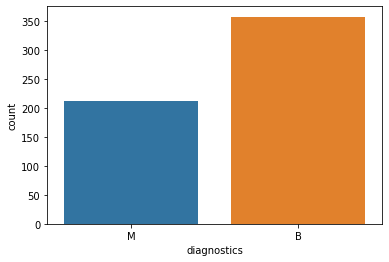

In [160]:
sns.countplot(NucliData_df['diagnostics'], label='count')

In [161]:
NucliData_df.shape

(569, 32)

In [162]:
NucliData_df.dtypes

id                           int64
diagnostics                 object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [163]:
NucliData_df.head(10)

,id,diagnostics,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [164]:
# malignant is assigned as 1 and benign as 0
# [row number, column number]
# : indicates all entries
NucliData_df.iloc[:,1]

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnostics, Length: 569, dtype: object

In [165]:
NucliData_df.iloc[:,1].values

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M

In [166]:
# Encode target labels with value between 0 and n_classes-1 thats why LabelEncoder is used
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
# labelencoder_y.fit_transform(NucliData_df.iloc[:,1].values)
NucliData_df.iloc[:,1] = labelencoder_y.fit_transform(NucliData_df.iloc[:,1].values)


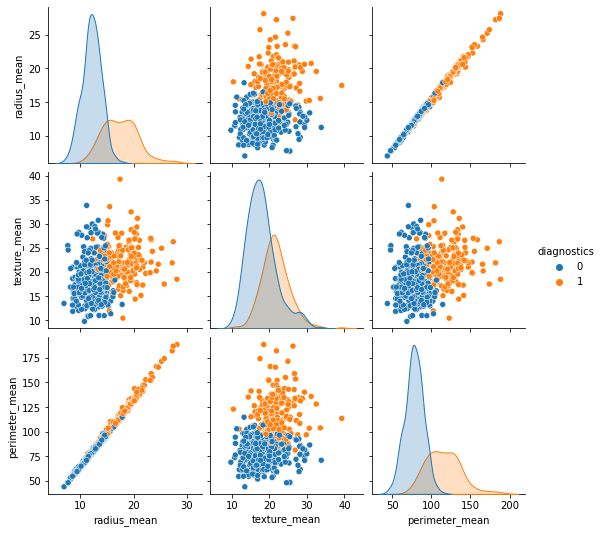

In [167]:
sns.pairplot(NucliData_df.iloc[:,1:5], hue='diagnostics')
#sns.pairplot(NucliData_df, hue='diagnostics')

In [168]:
# corr() is used to find the pairwise correlation of all columns in the dataframe.
#Correlation is a statistical term describing the degree to which two variables move in coordination with one another.
# Here we find correlation of the 10 real valued features with each other
NucliData_df.iloc[:,1:12].corr()

,diagnostics,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnostics,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


<AxesSubplot:>

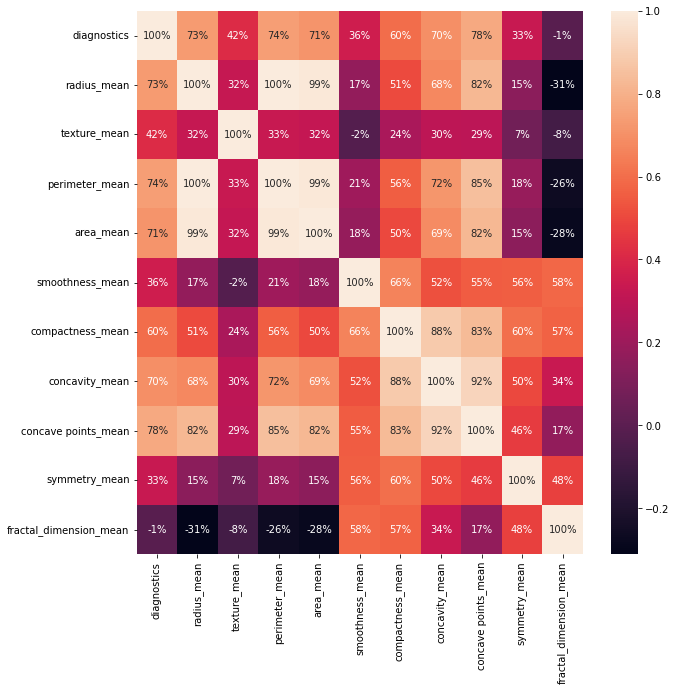

In [169]:
# plt used to resize the canvas
plt.figure(figsize=(10,10))
# plotting heatmap--visualizing correlation with heat map
sns.heatmap(NucliData_df.iloc[:,1:12].corr(), annot=True, fmt='.0%')

In [170]:
#spilt the data set into independent (X) and dependent (Y) data sets
X = NucliData_df.iloc[:,2:31].values
Y= NucliData_df.iloc[:,1].values

In [171]:
#split the data set into 75% training and 25% testing
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 0)
print(X_train)
# these are all numpy arrays


[[1.185e+01 1.746e+01 7.554e+01 ... 1.316e-01 9.140e-02 3.101e-01]
 [1.122e+01 1.986e+01 7.194e+01 ... 1.335e-02 2.022e-02 3.292e-01]
 [2.013e+01 2.825e+01 1.312e+02 ... 3.215e-01 1.628e-01 2.572e-01]
 ...
 [9.436e+00 1.832e+01 5.982e+01 ... 1.144e-01 5.052e-02 2.454e-01]
 [9.720e+00 1.822e+01 6.073e+01 ... 0.000e+00 0.000e+00 1.909e-01]
 [1.151e+01 2.393e+01 7.452e+01 ... 3.630e-01 9.653e-02 2.112e-01]]


In [172]:
#scale the data (feature scaling)
# Standardize features by removing the mean and scaling to unit variance.
# The standard score of a sample x is calculated as:
# z = (x - u) / s
# where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
print(X_train)

[[-0.65079907 -0.43057322 -0.68024847 ... -0.69592933 -0.36433881
   0.32349851]
 [-0.82835341  0.15226547 -0.82773762 ... -1.29277423 -1.45036679
   0.62563098]
 [ 1.68277234  2.18977235  1.60009756 ...  0.26255563  0.72504581
  -0.51329768]
 ...
 [-1.33114223 -0.22172269 -1.3242844  ... -0.78274313 -0.98806491
  -0.69995543]
 [-1.25110186 -0.24600763 -1.28700242 ... -1.36015587 -1.75887319
  -1.56206114]
 [-0.74662205  1.14066273 -0.72203706 ...  0.47201917 -0.2860679
  -1.24094654]]


In [173]:
# create a function for the models
# n_estimator = number of the trees
# max_depth = maximum depth of the tree
# min_samples_Split =  the minimum number of samples required to split an internal node:
# min_weight_fraction_leaf = 
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
 max_depth=None, max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
 min_samples_split=2, min_weight_fraction_leaf=0.0,
 n_estimators=10, n_jobs=1, oob_score=False, random_state=None, verbose=0, warm_start=False)

Y_pred  = rf.predict(X_test)

In [174]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred)
print(false_positive_rate)
print(true_positive_rate)
print(thresholds)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

[0.         0.03333333 1.        ]
[0.         0.98113208 1.        ]
[2 1 0]
0.9738993710691823


0.979454926624738 77


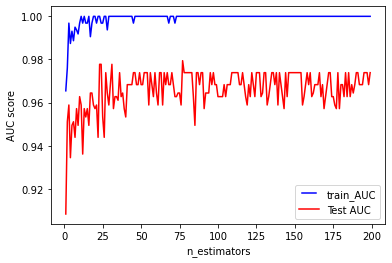

In [175]:
n_estimators = np.arange(1,200,1)

train_results = []
test_results = []
for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator,n_jobs=-1)
    rf.fit(X_train, Y_train)

    train_pred = rf.predict(X_train)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, train_pred)
    # print(false_positive_rate, true_positive_rate, thresholds, "train")
    # print()
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)


    Y_pred = rf.predict(X_test)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred)
    # print(false_positive_rate, true_positive_rate, thresholds, "test")
    # print()
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

max_y = max(test_results)
max_x = n_estimators[test_results.index(max_y)]
print(max_y, max_x)

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(n_estimators, train_results, 'b', label="train_AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label = 'Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

0.9833333333333334 30

0.9833333333333334 39

0.979454926624738 26

0.9850104821802935 8

0.9833333333333334 21

0.9833333333333334 43

0.9850104821802935 39

0.9833333333333334 31

0.9833333333333334 49

0.9811320754716981 16

0.979454926624738 6

0.9738993710691823 3


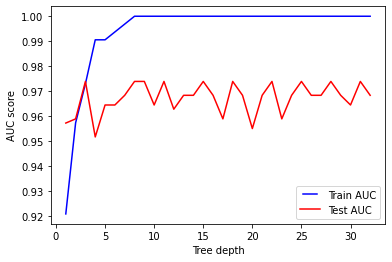

In [176]:
max_depths = np.linspace(1,32,32, endpoint=True)

train_results = []
test_results = []

for max_depth in max_depths:
  rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
  rf.fit(X_train, Y_train)

  train_pred = rf.predict(X_train)

  false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, train_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  train_results.append(roc_auc)

  Y_pred = rf.predict(X_test)

  false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  test_results.append(roc_auc)

max_y = max(test_results)
max_x = n_estimators[test_results.index(max_y)]
print(max_y, max_x)

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(max_depths, train_results, 'b', label = "Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label = "Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()
  

0.9777777777777779 13

0.9738993710691823 11

0.9738993710691823 9

0.9738993710691823 6

0.9833333333333334 13

0.9777777777777779 9


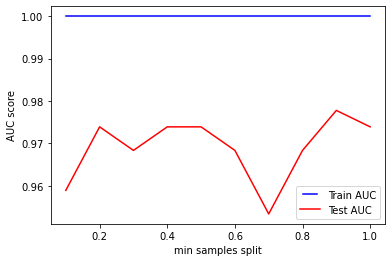

In [177]:
min_samples_splits = np.linspace(0.1, 1.0,10, endpoint = True)

train_results = []
test_results = []

for min_samples_split in min_samples_splits:
  rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
  rf.fit(X_train, Y_train)

  train_pred = rf.predict(X_train)

  false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, train_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  train_results.append(roc_auc)

  Y_pred = rf.predict(X_test)

  false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  test_results.append(roc_auc)

max_y = max(test_results)
max_x = n_estimators[test_results.index(max_y)]
print(max_y, max_x)

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(min_samples_splits, train_results, 'b', label = "Train AUC")
line2, = plt.plot(min_samples_splits, test_results, 'r', label = "Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

0.9738993710691823 3

0.9683438155136268 1

0.9738993710691823 2

0.9738993710691823 1

0.979454926624738 10

0.9738993710691823 5

0.9833333333333334 5

0.9738993710691823 2

0.9738993710691823 2

0.9738993710691823 7

0.9738993710691823 1

0.9627882599580713 4


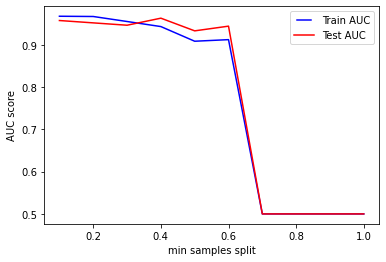

In [178]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []

for min_samples_split in min_samples_splits:
   rf = RandomForestClassifier(min_samples_split=min_samples_split)
   rf.fit(X_train, Y_train)

   train_pred = rf.predict(X_train)

   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)

   Y_pred = rf.predict(X_test)

   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

max_y = max(test_results)
max_x = n_estimators[test_results.index(max_y)]
print(max_y, max_x)

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

0.9683438155136268 1

0.9572327044025157 4

0.9627882599580713 1

0.9627882599580713 2

0.9627882599580713 2

0.9516771488469602 1

0.9572327044025157 2

0.9516771488469602 1


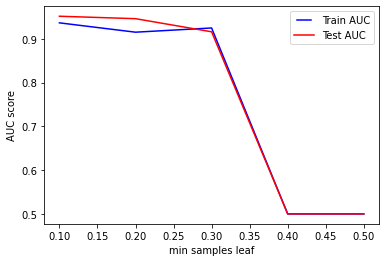

In [179]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)

train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:

   rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf)
   rf.fit(X_train, Y_train)

   train_pred = rf.predict(X_train)

   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)

   Y_pred = rf.predict(X_test)

   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

max_y = max(test_results)
max_x = n_estimators[test_results.index(max_y)]
print(max_y, max_x)

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

0.9516771488469602 1

0.9461215932914047 1

0.9516771488469602 1

0.9533542976939203 1

0.9533542976939203 1

In [180]:
n_estimators = [6, 8, 16, 21, 26, 30, 31, 39, 43, 49]

max_features = ['auto', 'sqrt']

max_depths = [6, 9, 11, 13]

min_samples_splits = [1, 2, 3, 4, 5]

min_samples_leafs = [1]

bootstrap = [True, False]

In [181]:
param_grid = {
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth' : max_depths,
    
    'min_samples_leaf' : min_samples_leafs,
    'bootstrap' : bootstrap
}

print(param_grid)

{'n_estimators': [6, 8, 16, 21, 26, 30, 31, 39, 43, 49], 'max_features': ['auto', 'sqrt'], 'max_depth': [6, 9, 11, 13], 'min_samples_leaf': [1], 'bootstrap': [True, False]}


In [182]:
rf_Model = RandomForestClassifier()

In [183]:
from sklearn.model_selection import RandomizedSearchCV
rf_RandomGrid = RandomizedSearchCV(estimator = rf_Model, param_distributions = param_grid,n_iter = 100, cv=10, verbose = 2, n_jobs=4)

In [184]:
rf_RandomGrid.fit(X_train, Y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [6, 9, 11, 13],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1],
                                        'n_estimators': [6, 8, 16, 21, 26, 30,
                                                         31, 39, 43, 49]},
                   verbose=2)

In [185]:
rf_RandomGrid.best_params_

{'n_estimators': 26,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 9,
 'bootstrap': False}

In [186]:
print(f' Train Accuracy - : {rf_RandomGrid.score(X_train, Y_train)}: 3f')
print(f' Test Accuracy - : {rf_RandomGrid.score(X_test, Y_test)}: 3f')


 Train Accuracy - : 1.0: 3f
 Test Accuracy - : 0.9440559440559441: 3f


SVM

In [187]:
#def svm_model(X_train, Y_train):
from sklearn.svm import SVC
svc_lin = SVC(kernel = 'linear', random_state = 0)
svc_lin.fit(X_train, Y_train)

#Using SVC rbf
from sklearn.svm import SVC
svc_rbf = SVC(kernel = 'rbf', random_state = 0)
svc_rbf.fit(X_train, Y_train)

print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
  #return svc_rbf

[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.9882629107981221
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.9835680751173709


In [188]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, svc_lin.predict(X_test))
  
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

print(cm)
print((TP + TN) / (TP + TN + FN + FP))

[[86  4]
 [ 2 51]]
0.958041958041958


In [189]:
#finding optimal parameter for smo
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'linear', 'sigmoid']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,Y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, 

[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ...................

[CV] END ....................C=100, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=100, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=100, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=100, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=100, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ...................

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'linear', 'sigmoid']},
             verbose=2)

In [190]:
print(grid.best_estimator_)

SVC(C=100, gamma=0.001)


In [191]:
#def svm_model(X_train, Y_train):
from sklearn.svm import SVC
svc_lin_grid = SVC(C=100, gamma=0.001)
svc_lin_grid.fit(X_train, Y_train)


print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))

[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.9882629107981221


In [192]:
grid_predictions = svc_lin_grid.predict(X_test)
print(confusion_matrix(Y_test,grid_predictions))

cm = confusion_matrix(Y_test, grid_predictions)
  
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

print(cm)
print((TP + TN) / (TP + TN + FN + FP))

[[87  3]
 [ 1 52]]
[[87  3]
 [ 1 52]]
0.972027972027972


In [193]:
# sourabh asharma content

space = {
    'C' : hp.uniform("C", 0.001, 100),
    'gamma': hp.uniform("gamma", 0.001, 1),
    'kernel':hp.choice('kernel', ['poly','rbf','linear', 'sigmoid'])
    }

kernels = ['poly','rbf','linear','sigmoid']

In [206]:
from sklearn.metrics import accuracy_score

def objective(space):
    
    SVC_classifier = SVC(
            C = space['C'],
            gamma = space['gamma'],
            kernel = space['kernel']
        )
    
    SVC_classifier.fit(X_train, Y_train)
    
    y_pred = SVC_classify.predict(X_test)
    
    accuracy = accuracy_score(Y_test, y_pred)
    
    print(accuracy)
    
#     pred = SVC_classifier.predict(X_test)
    print('SCORE:', accuracy)
    return {'loss' : accuracy, 'status': STATUS_OK}


In [207]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                       space = space,
                       algo = tpe.suggest,
                       max_evals = 400,
                       trials = trials)


0.958041958041958                                                                                                      
SCORE:                                                                                                                 
0.958041958041958                                                                                                      
0.958041958041958                                                                                                      
SCORE:                                                                                                                 
0.958041958041958                                                                                                      
0.958041958041958                                                                                                      
SCORE:                                                                                                                 
0.958041958041958                       

0.958041958041958                                                                                                      
0.958041958041958                                                                                                      
SCORE:                                                                                                                 
0.958041958041958                                                                                                      
0.958041958041958                                                                                                      
SCORE:                                                                                                                 
0.958041958041958                                                                                                      
0.958041958041958                                                                                                      
SCORE:                                  

SCORE:                                                                                                                 
0.958041958041958                                                                                                      
0.958041958041958                                                                                                      
SCORE:                                                                                                                 
0.958041958041958                                                                                                      
0.958041958041958                                                                                                      
SCORE:                                                                                                                 
0.958041958041958                                                                                                      
0.958041958041958                       

0.958041958041958                                                                                                      
SCORE:                                                                                                                 
0.958041958041958                                                                                                      
0.958041958041958                                                                                                      
SCORE:                                                                                                                 
0.958041958041958                                                                                                      
0.958041958041958                                                                                                      
SCORE:                                                                                                                 
0.958041958041958                       

0.958041958041958                                                                                                      
0.958041958041958                                                                                                      
SCORE:                                                                                                                 
0.958041958041958                                                                                                      
0.958041958041958                                                                                                      
SCORE:                                                                                                                 
0.958041958041958                                                                                                      
0.958041958041958                                                                                                      
SCORE:                                  

SCORE:                                                                                                                 
0.958041958041958                                                                                                      
0.958041958041958                                                                                                      
SCORE:                                                                                                                 
0.958041958041958                                                                                                      
0.958041958041958                                                                                                      
SCORE:                                                                                                                 
0.958041958041958                                                                                                      
0.958041958041958                       

0.958041958041958                                                                                                      
SCORE:                                                                                                                 
0.958041958041958                                                                                                      
0.958041958041958                                                                                                      
SCORE:                                                                                                                 
0.958041958041958                                                                                                      
0.958041958041958                                                                                                      
SCORE:                                                                                                                 
0.958041958041958                       

0.958041958041958                                                                                                      
0.958041958041958                                                                                                      
SCORE:                                                                                                                 
0.958041958041958                                                                                                      
0.958041958041958                                                                                                      
SCORE:                                                                                                                 
0.958041958041958                                                                                                      
0.958041958041958                                                                                                      
SCORE:                                  

SCORE:                                                                                                                 
0.958041958041958                                                                                                      
0.958041958041958                                                                                                      
SCORE:                                                                                                                 
0.958041958041958                                                                                                      
0.958041958041958                                                                                                      
SCORE:                                                                                                                 
0.958041958041958                                                                                                      
0.958041958041958                       

0.958041958041958                                                                                                      
SCORE:                                                                                                                 
0.958041958041958                                                                                                      
0.958041958041958                                                                                                      
SCORE:                                                                                                                 
0.958041958041958                                                                                                      
0.958041958041958                                                                                                      
SCORE:                                                                                                                 
0.958041958041958                       

0.958041958041958                                                                                                      
0.958041958041958                                                                                                      
SCORE:                                                                                                                 
0.958041958041958                                                                                                      
0.958041958041958                                                                                                      
SCORE:                                                                                                                 
0.958041958041958                                                                                                      
0.958041958041958                                                                                                      
SCORE:                                  

SCORE:                                                                                                                 
0.958041958041958                                                                                                      
0.958041958041958                                                                                                      
SCORE:                                                                                                                 
0.958041958041958                                                                                                      
0.958041958041958                                                                                                      
SCORE:                                                                                                                 
0.958041958041958                                                                                                      
0.958041958041958                       

0.958041958041958                                                                                                      
SCORE:                                                                                                                 
0.958041958041958                                                                                                      
0.958041958041958                                                                                                      
SCORE:                                                                                                                 
0.958041958041958                                                                                                      
0.958041958041958                                                                                                      
SCORE:                                                                                                                 
0.958041958041958                       

0.958041958041958                                                                                                      
0.958041958041958                                                                                                      
SCORE:                                                                                                                 
0.958041958041958                                                                                                      
0.958041958041958                                                                                                      
SCORE:                                                                                                                 
0.958041958041958                                                                                                      
0.958041958041958                                                                                                      
SCORE:                                  

SCORE:                                                                                                                 
0.958041958041958                                                                                                      
0.958041958041958                                                                                                      
SCORE:                                                                                                                 
0.958041958041958                                                                                                      
0.958041958041958                                                                                                      
SCORE:                                                                                                                 
0.958041958041958                                                                                                      
0.958041958041958                       

0.958041958041958                                                                                                      
SCORE:                                                                                                                 
0.958041958041958                                                                                                      
0.958041958041958                                                                                                      
SCORE:                                                                                                                 
0.958041958041958                                                                                                      
0.958041958041958                                                                                                      
SCORE:                                                                                                                 
0.958041958041958                       

0.958041958041958                                                                                                      
0.958041958041958                                                                                                      
SCORE:                                                                                                                 
0.958041958041958                                                                                                      
0.958041958041958                                                                                                      
SCORE:                                                                                                                 
0.958041958041958                                                                                                      
0.958041958041958                                                                                                      
SCORE:                                  

SCORE:                                                                                                                 
0.958041958041958                                                                                                      
0.958041958041958                                                                                                      
SCORE:                                                                                                                 
0.958041958041958                                                                                                      
0.958041958041958                                                                                                      
SCORE:                                                                                                                 
0.958041958041958                                                                                                      
0.958041958041958                       

In [196]:
print("The best hyperparameters:", "\n")
print(best_hyperparams)
print(kernels[best_hyperparams['kernel']])

The best hyperparameters: 

{'C': 22.804436543069404, 'gamma': 0.20864310457445956, 'kernel': 2}
linear


In [197]:
SVC_classify = SVC(
            C = best_hyperparams['C'],
            gamma = best_hyperparams['gamma'],
            kernel = kernels[best_hyperparams['kernel']],
                
                )

In [198]:
SVC_classify.fit(X_train, Y_train)
                           
SVC_classify.score(X_train, Y_train)

0.9882629107981221

In [199]:
print('real value : ')
print(Y_test)
print()
print()

print('observed value : ')

y_pred = SVC_classify.predict(X_test)
print(y_pred)

from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, y_pred))



real value : 
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]


observed value : 
[1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0
 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]
0.958041958041958


In [200]:
from sklearn.metrics import confusion_matrix

def Matrix(Y_predict):
    cm = confusion_matrix(Y_test, Y_predict)
    
    TP = cm[0][0]
    TN = cm[1][1]
    FP = cm[0][1]
    FN = cm[1][0]

    print(cm)
    print()

    Accuracy = (TP+TN)/(TP+TN+FP+FN)
    Precision = TP/(TP+FP)
    Recall = TP/(TP+FN)

    F1 = (2*Precision*Recall)/(Precision+Recall)

    print('Accuracy of the Classifier = ', Accuracy)
    print('Precision = ', Precision)
    print('F1 Score = ', F1)

In [201]:
Matrix(y_pred)

[[86  4]
 [ 2 51]]

Accuracy of the Classifier =  0.958041958041958
Precision =  0.9555555555555556
F1 Score =  0.9662921348314608


In [202]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from scipy.stats import loguniform
from sklearn.ensemble import RandomForestRegressor

#param_random = 
random_search = RandomizedSearchCV(SVC(),param_grid,cv=5, scoring="r2",verbose=1,n_jobs=-1, 
                             n_iter=50, random_state = 0
                           )
random_search.fit(X_train,Y_train)



Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=50, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'gamma': [1, 0.1, 0.01, 0.001],
                                        'kernel': ['rbf', 'poly', 'linear',
                                                   'sigmoid']},
                   random_state=0, scoring='r2', verbose=1)

In [203]:
random_search.best_params_
#random_search.best_score_

{'kernel': 'rbf', 'gamma': 0.001, 'C': 100}

In [204]:
#def svm_model(X_train, Y_train):
from sklearn.svm import SVC
svc_lin_random = SVC(C= 100, gamma= 0.001, kernel ='rbf')
svc_lin_random.fit(X_train, Y_train)

print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))

[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.9882629107981221
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.9835680751173709


In [205]:
random_predictions = svc_lin_random.predict(X_test)


print(confusion_matrix(Y_test,random_predictions))

Matrix(random_predictions)

cm = confusion_matrix(Y_test, random_predictions)
  
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

print(cm)

print((TP + TN) / (TP + TN + FN + FP))


[[87  3]
 [ 1 52]]
[[87  3]
 [ 1 52]]

Accuracy of the Classifier =  0.972027972027972
Precision =  0.9666666666666667
F1 Score =  0.9775280898876404
[[87  3]
 [ 1 52]]
0.972027972027972
